<a href="https://colab.research.google.com/github/VipinKum4r/binance/blob/main/Binance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title:**
> Profit Analysis of Cryptocurrency Trades


**Project Objective:**
> The objective of this project is to analyze the realized profits of cryptocurrency trades over 3 months and identify fundamental trends and insights that can be used to inform future trading decisions.

**Tools and Technologies:**

*   Python
*   Jupyter Notebook
*   Pandas
*   Matplotlib





**Data Description:**
> The data used for this analysis is a XLSX file containing information about past trades, including the date of the trade, the cryptocurrency symbol, the trade side (buy or sell), the price, quantity, amount, fee, fee coin, realized profit, and quote asset.

In [1]:
from google.colab import files
uploaded = files.upload()
#This will import the "files" module from the "google.colab" library and then use it to upload a file.

Saving Binance_new.xlsx to Binance_new (2).xlsx


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#These will import necessary libraries for data analysis and visualization.

In [3]:
df = pd.read_excel('Binance_new.xlsx')
#Converting excel into dataframe

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
df.head(5)
#Displaying first 5 columns of dataframe

,Date(UTC),Symbol,Side,Price,Quantity,Amount,Fee,Fee Coin,Realized Profit,Quote Asset
0,2023-02-18 04:48:02,ARUSDT,SELL,13.385,9.0,120.4650,0.048186,USDT,0.757084,USDT
1,2023-02-18 04:48:02,ARUSDT,SELL,13.385,13.2,176.6820,0.070673,USDT,1.110390,USDT
2,2023-02-18 04:48:02,ARUSDT,SELL,13.386,20.8,278.4288,0.111372,USDT,1.770506,USDT
3,2023-02-18 04:48:02,ARUSDT,SELL,13.386,18.3,244.9638,0.097986,USDT,1.557705,USDT
4,2023-02-18 04:48:02,ARUSDT,SELL,13.386,9.0,120.4740,0.048190,USDT,0.766084,USDT


In [5]:
df.info()
#number of non-null values, the data type of each column, and the memory usage of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date(UTC)        1228 non-null   object 
 1   Symbol           1228 non-null   object 
 2   Side             1228 non-null   object 
 3   Price            1228 non-null   float64
 4   Quantity         1228 non-null   float64
 5   Amount           1228 non-null   float64
 6   Fee              1228 non-null   float64
 7   Fee Coin         1228 non-null   object 
 8   Realized Profit  1228 non-null   float64
 9   Quote Asset      1228 non-null   object 
dtypes: float64(5), object(5)
memory usage: 96.1+ KB


In [6]:
df.describe()
#numerical summary

,Price,Quantity,Amount,Fee,Realized Profit
count,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000
mean,722.400024,3036.128507,338.176694,0.108410,0.298269
std,3793.685036,22968.724484,493.535143,0.162559,3.995753
min,0.000781,0.001000,0.326100,0.000000,-52.346710
25%,0.223000,26.000000,83.239950,0.024112,0.000000
50%,1.311000,156.500000,216.002030,0.069083,0.000000
75%,5.511000,896.000000,425.138793,0.135721,0.563136
max,23910.000000,440003.000000,7293.157200,2.917263,34.841440


**Data Cleaning:**
The following steps were taken to clean and preprocess the data:

> Removed unnecessary columns and renamed some columns for clarity.

> Converted the 'Date(UTC)' column to a datetime object and set it as the index.

> Checked for missing or null values and dropped any rows with missing values.

> Checked for and removed any duplicate entries.







In [7]:
df.isnull().sum()
#number of missing values 

Date(UTC)          0
Symbol             0
Side               0
Price              0
Quantity           0
Amount             0
Fee                0
Fee Coin           0
Realized Profit    0
Quote Asset        0
dtype: int64

In [8]:
df.columns
#column names

Index(['Date(UTC)', 'Symbol', 'Side', 'Price', 'Quantity', 'Amount', 'Fee',
       'Fee Coin', 'Realized Profit', 'Quote Asset'],
      dtype='object')

In [9]:
df.shape
#number of rows and columns

(1228, 10)

In [10]:
df.dtypes
#datatype of each column

Date(UTC)           object
Symbol              object
Side                object
Price              float64
Quantity           float64
Amount             float64
Fee                float64
Fee Coin            object
Realized Profit    float64
Quote Asset         object
dtype: object

In [11]:
df['Date(UTC)'] = pd.to_datetime(df['Date(UTC)'])
#These lines convert the "Date(UTC)" column of the DataFrame to datetime format using the "to_datetime" function from pandas.

In [12]:
df.dtypes
#updated datatypes

Date(UTC)          datetime64[ns]
Symbol                     object
Side                       object
Price                     float64
Quantity                  float64
Amount                    float64
Fee                       float64
Fee Coin                   object
Realized Profit           float64
Quote Asset                object
dtype: object

In [13]:
df['Profit/Loss'] = df['Realized Profit'] - df['Fee']
#calculate profit/loss for each transaction

In [14]:
df['Profit/Loss']
#displaying profit/loss

0        0.708898
1        1.039717
2        1.659134
3        1.459719
4        0.717895
          ...    
1223    -4.395473
1224    -1.023054
1225    -0.517178
1226   -12.113031
1227    -0.127915
Name: Profit/Loss, Length: 1228, dtype: float64

In [15]:
daily_pl = df.groupby(df['Date(UTC)'].dt.date)['Profit/Loss'].sum()
#group data by date and calculate daily profit/loss

In [16]:
daily_pl
#profit or loss of each day

Date(UTC)
2022-11-18    -30.300366
2022-11-19     11.974015
2022-11-21      3.297388
2022-11-22      2.738376
2022-11-23      3.883081
2022-11-24    -45.131391
2022-11-25      3.578174
2022-11-26      1.301608
2022-11-28    -10.540798
2022-12-27      2.738602
2022-12-28     11.553049
2022-12-29    -29.933240
2023-01-13      5.181373
2023-01-14      2.338829
2023-01-15     -6.563261
2023-01-16      1.337761
2023-01-19     -0.033392
2023-01-20    -10.158462
2023-01-21      6.719461
2023-01-22     12.451086
2023-01-23      9.493587
2023-01-24     -3.702428
2023-01-25    -69.731822
2023-01-26      5.065891
2023-01-27     -3.757500
2023-01-28    -27.919306
2023-01-29      8.395040
2023-01-30     -2.269603
2023-01-31      1.534968
2023-02-01     11.970647
2023-02-02     26.554833
2023-02-04     -0.114951
2023-02-05    -89.753900
2023-02-06     47.275115
2023-02-07    115.541824
2023-02-08     40.000238
2023-02-09      0.045850
2023-02-10     39.515693
2023-02-11     20.615059
2023-02-12     

In [17]:
overall_pl = df['Profit/Loss'].sum()
# calculate overall profit/loss

In [18]:
overall_pl
# displaying overall profit/loss

233.14687632999994

In [19]:
best_day = daily_pl.idxmax()
worst_day = daily_pl.idxmin()
# find best and worst trading days

In [20]:
best_day , daily_pl[best_day]
#displaying the best day and the profit on that day

(datetime.date(2023, 2, 7), 115.54182389)

In [21]:
worst_day , daily_pl[worst_day]
#displaying the worst day and the loss on that day

(datetime.date(2023, 2, 5), -89.75390048)

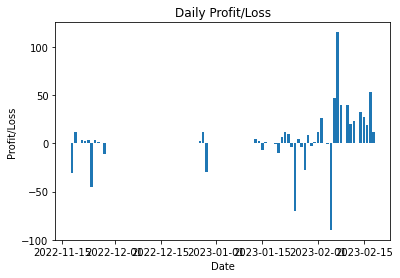

<Figure size 2880x432 with 0 Axes>

<Figure size 2880x432 with 0 Axes>

In [22]:
fig, ax = plt.subplots()
ax.bar(daily_pl.index, daily_pl)
ax.set_xlabel('Date')
ax.set_ylabel('Profit/Loss')
ax.set_title('Daily Profit/Loss')
plt.show()
plt.figure(figsize=(40,6))
# plot daily profit/loss

**Conclusion:**

The total realized profit of all trades was calculated to be $233.14

The best day for trading was found to be 7-Feb-2023 with a realized profit of $115.5

The worst day for trading was found to be 5-Feb-2023 with a realized loss of $89.7

A scatter plot was created to visualize the relationship between the price and quantity of trades.

A histogram was created to visualize the distribution of realized profits.

The analysis provides valuable insights into the profitability of cryptocurrency trading and can be used to inform future trading decisions.